In [1]:
# Using results saved to plot

import numpy as np
import matplotlib.pyplot as plt
import utils

# matplotlib.rcParams.update({'font.size': 14})


zgrid = utils.check_load_data('zgrid')
zgrid = np.asarray(zgrid)

kgrid = utils.check_load_data('kgrid')
kgrid = np.asarray(kgrid)

rgrid = utils.check_load_data('rgrid')
rgrid = np.asarray(rgrid)

Bgrid = utils.check_load_data('Bgrid')
Bgrid = np.asarray(Bgrid)

fgrid = utils.check_load_data('fgrid')
fgrid = np.asarray(fgrid)

nextk = utils.check_load_data('nextk')
nextk = np.asarray(nextk)

nextB = utils.check_load_data('nextB')
nextB = np.asarray(nextB)

nextf = utils.check_load_data('nextf')
nextf = np.asarray(nextf)

qs = utils.check_load_data('qs')
qs = np.asarray(qs)

ql = utils.check_load_data('ql')
ql = np.asarray(ql)

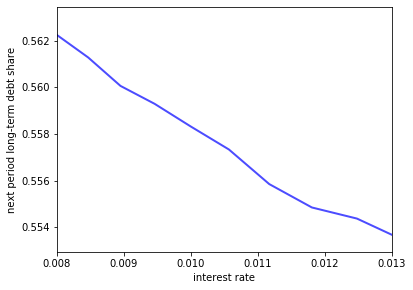

In [30]:
# decision rules
# nextf(z,k,r,b,f) as a function of r 
fig, ax = plt.subplots(figsize=(6,4.5))

r_xaxis = [] # x-axis is grids of r
nextf_yaxis_m = []
for ir in range(np.size(rgrid)):
    r_xaxis.append(rgrid[ir]) 
    nextf_yaxis_m.append(np.mean(fgrid[nextf[:, :, ir, :,:]]))
     
ax.plot(r_xaxis, nextf_yaxis_m, linestyle = '-', color='blue', lw=2, alpha=0.7)

plt.xlim([0.008, 0.013])
ax.set_xlabel('interest rate')
ax.set_ylabel('next period long-term debt share')

# plt.yticks(np.arange(2.656, 2.6585, 0.001))
plt.savefig('nextf(r).pdf')
plt.show()


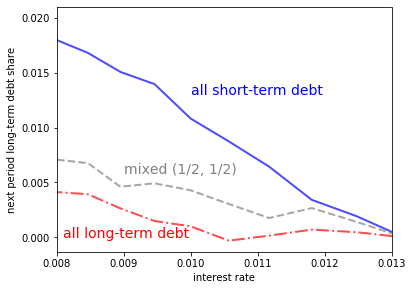

In [34]:
# decision rules
# nextf(z,k,r,b,f) as a function of r 
fig, ax = plt.subplots(figsize=(6,4.5))


r_xaxis = [] # x-axis is grids of r
nextf_yaxis_lowmat = []
nextf_yaxis_midmat = []
nextf_yaxis_highmat = []

for ir in range(np.size(rgrid)):
    r_xaxis.append(rgrid[ir]) 
    nextf_yaxis_lowmat.append(np.mean( fgrid[nextf[:, :, ir, :, 0]]))
    nextf_yaxis_midmat.append(np.mean( fgrid[nextf[:, :, ir, :, 5]]))
    nextf_yaxis_highmat.append(np.mean(fgrid[nextf[:, :, ir, :, 9]]))
ax.plot(r_xaxis, nextf_yaxis_lowmat - nextf_yaxis_lowmat[10], linestyle = '-', color='blue', lw=2, alpha=0.7)
ax.plot(r_xaxis, nextf_yaxis_midmat - nextf_yaxis_midmat[10], linestyle = '--', color='gray', lw=2, alpha=0.7)
ax.plot(r_xaxis, nextf_yaxis_highmat - nextf_yaxis_highmat[10] , linestyle = '-.', color='red', lw=2, alpha=0.7)
ax.annotate("all short-term debt",color='blue', xy=(0.01, 0.013),xytext=(0.01, 0.013), fontsize = 14)
ax.annotate("all long-term debt",color='red', xy=(0.0081,0.000),xytext=(0.0081,0.000), fontsize = 14)
ax.annotate("mixed (1/2, 1/2)",color='gray', xy=(0.009,0.0058),xytext=(0.009,0.0058), fontsize = 14)
#ax.annotate("", xy=(0.0101,0.006),xytext=(0.011,0.006), arrowprops=dict(arrowstyle="->",color='gray'))
plt.xlim([0.008, 0.013])

ax.set_xlabel('interest rate')
ax.set_ylabel('next period long-term debt share')

plt.yticks(np.arange(0, 0.021, 0.005))
plt.savefig('nextf(r)_diffmat.pdf')
plt.show()
